# Data Science Sem 5 Assignment Part 1 

# 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# 2. Load and Preprocess the Data


In [2]:
dataset = pd.read_csv(r"C:\Users\Lenovo\DS Sem 4\swiggy.csv")

In [3]:
dataset.shape

(8680, 10)

In [4]:
dataset.dtypes

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object

In [5]:
dataset.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [6]:
columns_to_drop = ['ID', 'Restaurant', 'Address']
data_cleaned = dataset.drop(columns=columns_to_drop, axis=1)

In [7]:
print(data_cleaned.isnull().sum())


Area             0
City             0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Delivery time    0
dtype: int64


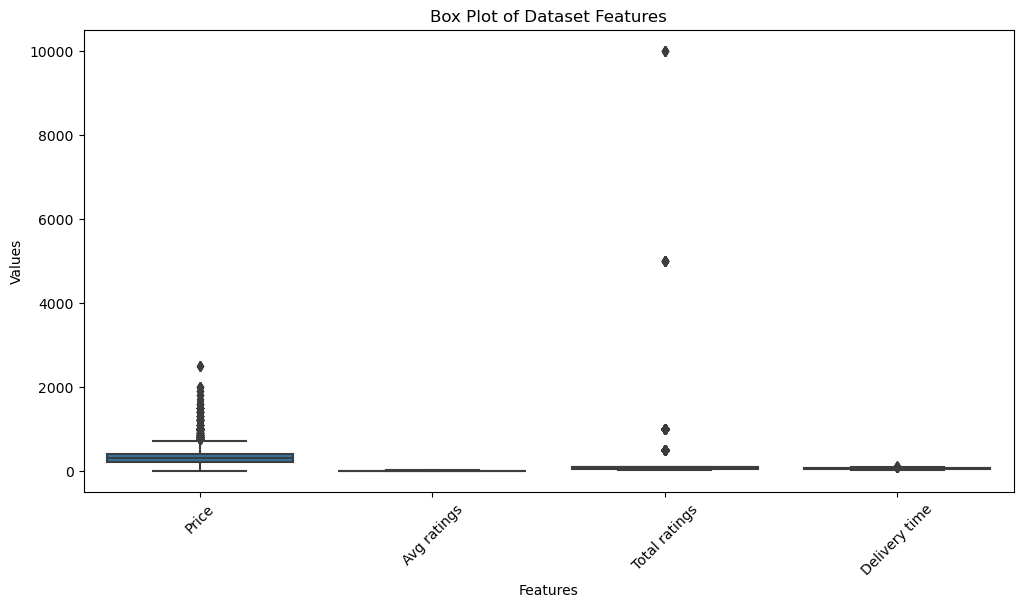

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned)
plt.title("Box Plot of Dataset Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

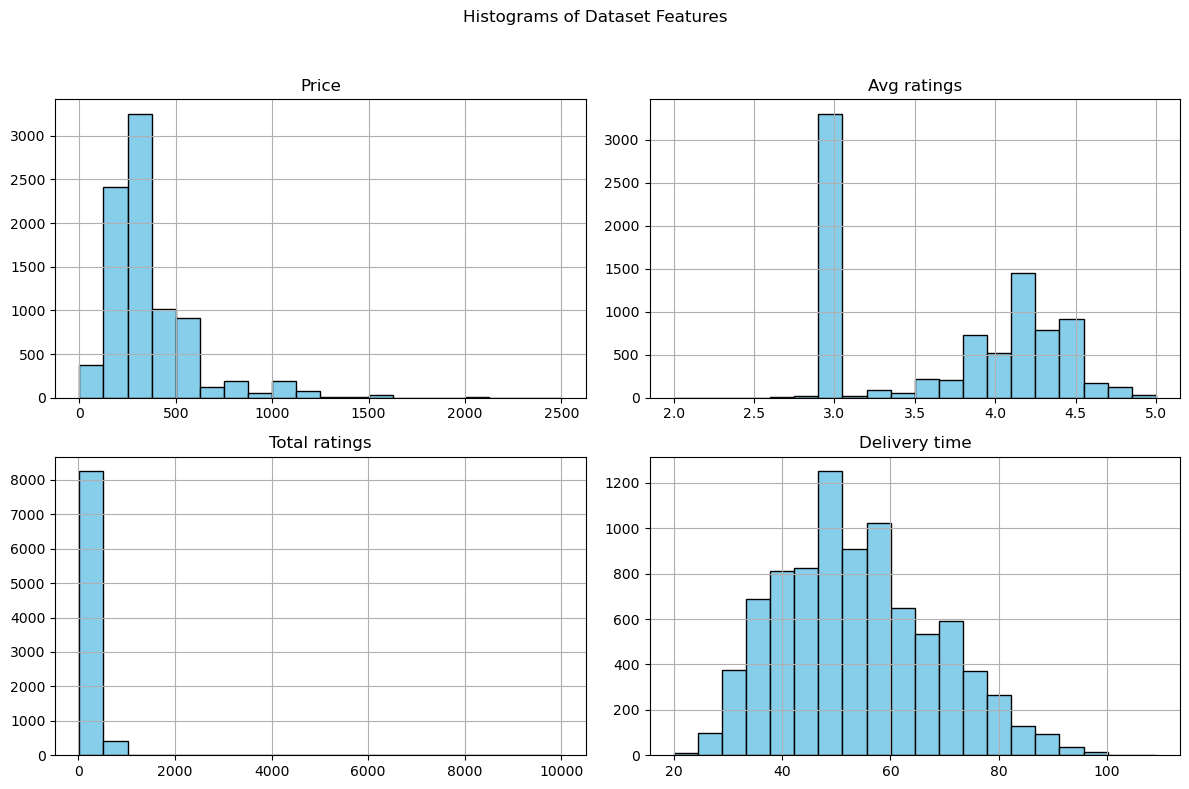

In [10]:
data_cleaned.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Dataset Features")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [19]:
categorical_columns = ['Area', 'City', 'Food type']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = pd.DataFrame(encoder.fit_transform(data_cleaned[categorical_columns]),
                                 columns=encoder.get_feature_names_out(categorical_columns))



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
data_encoded = pd.concat([data_cleaned.drop(columns=categorical_columns), encoded_features], axis=1)

# 3. Split Data into X (Independent) and Y (Dependent) Variables

In [21]:
X = data_encoded.drop(columns=['Delivery time'])
Y = data_encoded['Delivery time']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train a Linear Regression Model, Predict and Evaluate 

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [26]:
Y_pred = model.predict(X_test_scaled)

In [27]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.8678288046425402e+29
R-squared: -8.936494029790235e+26


# 7. Visualize Results And End of Part 1 assignment 

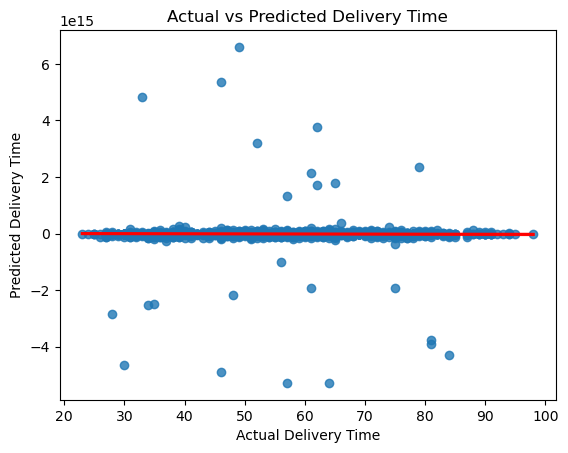

In [29]:
sns.regplot(x=Y_test, y=Y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.show()

# 6. Running the OLS model 

In [30]:
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(Y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery time   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     8.686
Date:                Tue, 24 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:41:12   Log-Likelihood:                -19847.
No. Observations:                6944   AIC:                         4.727e+04
Df Residuals:                    3157   BIC:                         7.319e+04
Df Model:                        3786                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

# 7. Removing Columns with Higher P-value

In [31]:
high_p_columns = ols_model.pvalues[ols_model.pvalues > 0.05].index
X_train_reduced = X_train.drop(columns=high_p_columns, errors='ignore')
X_test_reduced = X_test.drop(columns=high_p_columns, errors='ignore')

# 8. Running VarianceThreshold and PCA

In [32]:
selector = VarianceThreshold(threshold=0.1)
X_train_var = selector.fit_transform(X_train_reduced)
X_test_var = selector.transform(X_test_reduced)

In [33]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_var)
X_test_pca = pca.transform(X_test_var)

# 9. Now lets run and see the various Regression Models 

In [34]:
lr = LinearRegression()
lr.fit(X_train_pca, Y_train)
Y_pred_lr = lr.predict(X_test_pca)
r2_lr = r2_score(Y_test, Y_pred_lr)
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
print(f"Linear Regression - R-squared: {r2_lr:.4f}, MSE: {mse_lr:.4f}")

Linear Regression - R-squared: 0.0183, MSE: 205.1926


Before the OLS model and removing the P values the r-squared value was in negative.
After running PCA and Variance Threshold the accuracy has increased from negative to positive.

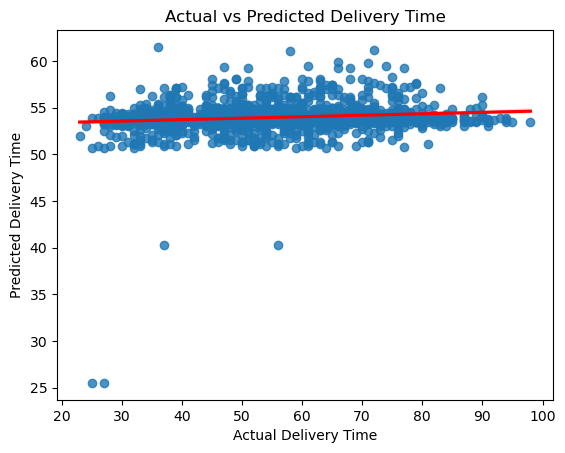

In [35]:
sns.regplot(x=Y_test, y=Y_pred_lr, line_kws={"color": "red"})
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.show()

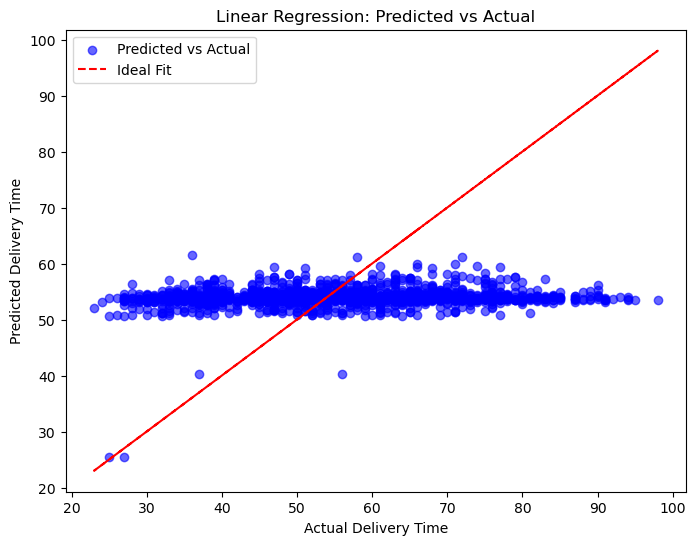

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_lr, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Ideal Fit')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.legend()
plt.show()

In [37]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_pca, Y_train)
Y_pred_rf = rf.predict(X_test_pca)
r2_rf = r2_score(Y_test, Y_pred_rf)
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
print(f"Random Forest - R-squared: {r2_rf:.4f}, MSE: {mse_rf:.4f}")

Random Forest - R-squared: 0.0611, MSE: 196.2419


After trying some models like SVM and Lasso, I found out that Random Forest Regressor has the highest accuracy found on this dataset

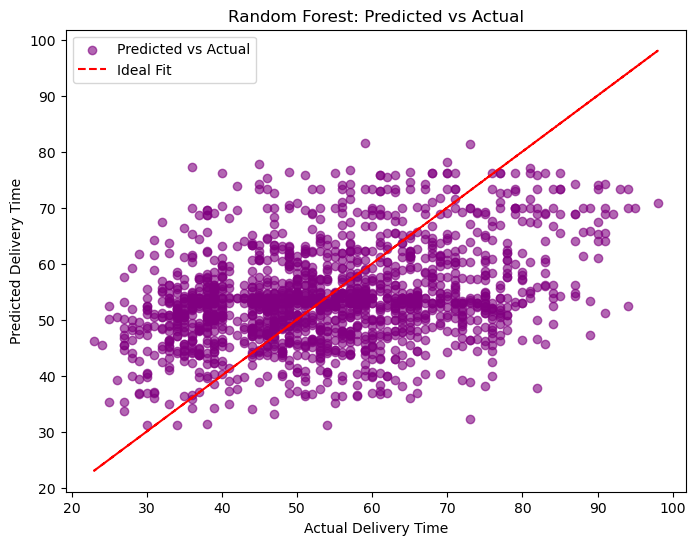

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_rf, color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Ideal Fit')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.legend()
plt.show()

In [39]:
svr = SVR()
svr.fit(X_train_pca, Y_train)
Y_pred_svr = svr.predict(X_test_pca)
r2_svr = r2_score(Y_test, Y_pred_svr)
mse_svr = mean_squared_error(Y_test, Y_pred_svr)
print(f"SVM - R-squared: {r2_svr:.4f}, MSE: {mse_svr:.4f}")

SVM - R-squared: 0.0062, MSE: 207.7150


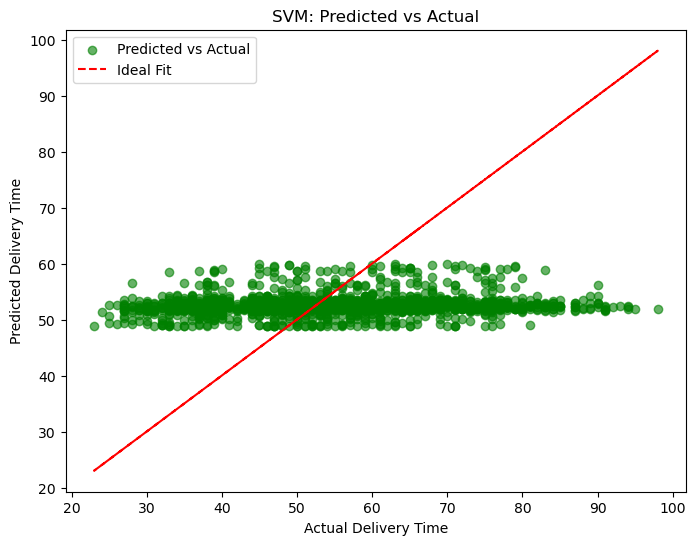

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_svr, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot(Y_test, Y_test, color='red', linestyle='--', label='Ideal Fit')
plt.title('SVM: Predicted vs Actual')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.legend()
plt.show()

In [41]:
from sklearn.linear_model import Lasso

In [42]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_pca, Y_train)
Y_pred_lasso = lasso.predict(X_test_pca)
r2_lasso = r2_score(Y_test, Y_pred_lasso)
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print(f"Lasso Regression - R-squared: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}")

Lasso Regression - R-squared: 0.0183, MSE: 205.1929


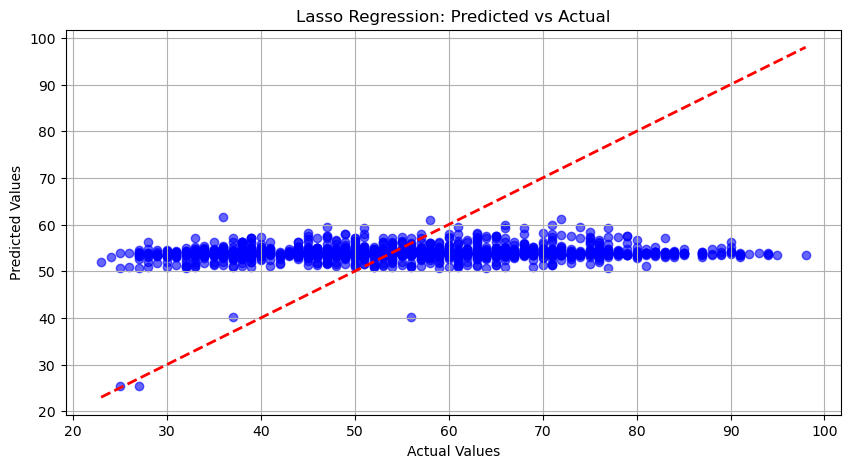

In [43]:
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, Y_pred_lasso, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Lasso Regression: Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()
plt.show()

# Tried different Metrics 

I tried some different metrics like RAE and RMSE,
To find out how my dataset is acting for other metrics. I have used RAE which is used for comparing your model to a baseline (e.g., mean predictor). For focusing on prediction accuracy and robustness rather than variance explanation. It is used for assessing prediction accuracy.

In [44]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_rae(y_true, y_pred):
    numerator = np.sum(np.abs(y_true - y_pred))
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    return numerator / denominator

# Implementation on the used Models

In [45]:
rmse_lr = calculate_rmse(Y_test, Y_pred_lr)
rae_lr = calculate_rae(Y_test, Y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr:.4f}, RAE: {rae_lr:.4f}")

rmse_rf = calculate_rmse(Y_test, Y_pred_rf)
rae_rf = calculate_rae(Y_test, Y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf:.4f}, RAE: {rae_rf:.4f}")

rmse_lasso = calculate_rmse(Y_test, Y_pred_lasso)
rae_lasso = calculate_rae(Y_test, Y_pred_lasso)
print(f"Lasso Regression - RMSE: {rmse_lasso:.4f}, RAE: {rae_lasso:.4f}")

rmse_svr = calculate_rmse(Y_test, Y_pred_svr)
rae_svr = calculate_rae(Y_test, Y_pred_svr)
print(f"SVM - RMSE: {rmse_svr:.4f}, RAE: {rae_svr:.4f}")

Linear Regression - RMSE: 14.3245, RAE: 0.9888
Random Forest - RMSE: 14.0086, RAE: 0.9657
Lasso Regression - RMSE: 14.3246, RAE: 0.9888
SVM - RMSE: 14.4123, RAE: 0.9863


By Testing on the simplle baseline of the dataset, I got the accracy of avg 98% in all the regression models.

# Analysis

# Key Observations for best fit for the data

I found out that Random Forest Regressor is the best fit for my dataset as its R-squared value: 0.06 which was highest as comapred to all models. When I tried different metrics I found out that when the RAE metric is used on baseline for comaprison I found that Linear Regression and Lasso Regression is the highest in that with value : 0.988.